In [69]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [70]:
df = pd.read_csv(r"C:\Users\USER\Downloads\CAR DETAILS FROM CAR DEKHO.csv")
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner


In [71]:
df.isnull().sum()

name             0
year             0
selling_price    0
km_driven        0
fuel             0
seller_type      0
transmission     0
owner            0
dtype: int64

In [72]:
df.shape

(4340, 8)

In [73]:
df.dtypes

name             object
year              int64
selling_price     int64
km_driven         int64
fuel             object
seller_type      object
transmission     object
owner            object
dtype: object

In [74]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4340 entries, 0 to 4339
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   name           4340 non-null   object
 1   year           4340 non-null   int64 
 2   selling_price  4340 non-null   int64 
 3   km_driven      4340 non-null   int64 
 4   fuel           4340 non-null   object
 5   seller_type    4340 non-null   object
 6   transmission   4340 non-null   object
 7   owner          4340 non-null   object
dtypes: int64(3), object(5)
memory usage: 271.4+ KB


In [75]:
for i in df.columns:
    print(i,':','\n',df[i].unique())

name : 
 ['Maruti 800 AC' 'Maruti Wagon R LXI Minor' 'Hyundai Verna 1.6 SX' ...
 'Mahindra Verito 1.5 D6 BSIII'
 'Toyota Innova 2.5 VX (Diesel) 8 Seater BS IV'
 'Hyundai i20 Magna 1.4 CRDi']
year : 
 [2007 2012 2017 2014 2016 2015 2018 2019 2013 2011 2010 2009 2006 1996
 2005 2008 2004 1998 2003 2002 2020 2000 1999 2001 1995 1997 1992]
selling_price : 
 [  60000  135000  600000  250000  450000  140000  550000  240000  850000
  365000  260000 1650000  585000 1195000  390000 1964999 1425000  975000
 1190000  930000  525000 1735000 1375000  900000 1300000 1400000  229999
 1550000 1250000  625000 1050000  560000  290000  275000  411000  150000
  500000  100000  725000  401000  750000  310000  665000  465000  160000
  675000  300000   70000  151000  280000  350000  570000  125000  130000
  925000  200000  248000   80000  650000  495000  371000 1025000 8150000
  325000 1470000 2800000  210000 1150000 4500000 2750000 1975000  175000
 2500000  628000  399000  315000  780000  434000  690000  55

In [76]:
df['brand'] = df['name'].str.split(' ').str[0]

In [77]:
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,brand
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner,Maruti
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner,Maruti
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner,Hyundai
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner,Datsun
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner,Honda


In [78]:
df.dtypes

name             object
year              int64
selling_price     int64
km_driven         int64
fuel             object
seller_type      object
transmission     object
owner            object
brand            object
dtype: object

In [79]:
num_cols = ['selling_price', 'km_driven', 'year']
cat_cols = ['fuel', 'seller_type', 'transmission', 'owner', 'brand']

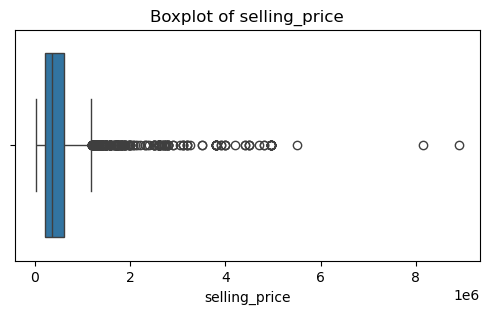

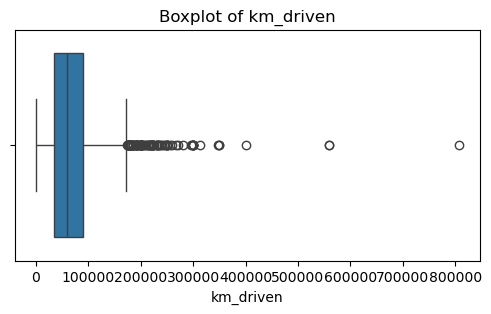

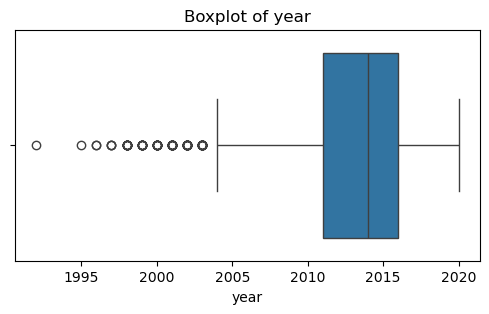

In [80]:
for col in num_cols:
    plt.figure(figsize=(6,3))
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot of {col}')
    plt.show()

In [81]:
def iqr_capping(df, col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1

    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR

    df[col] = np.where(df[col] < lower, lower,
                        np.where(df[col] > upper, upper, df[col]))
    return df

In [82]:
df = iqr_capping(df, 'selling_price')
df = iqr_capping(df, 'km_driven')

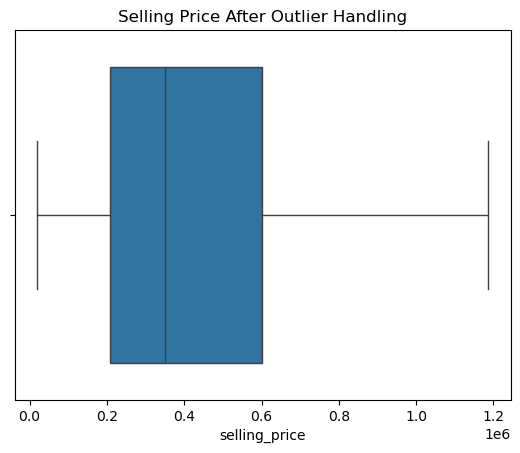

In [83]:
sns.boxplot(x=df['selling_price'])
plt.title('Selling Price After Outlier Handling')
plt.show()

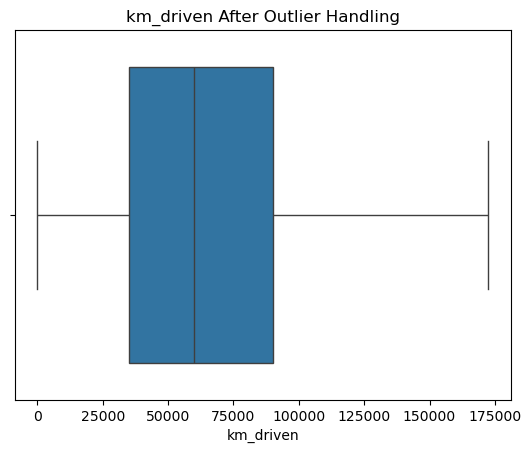

In [84]:
sns.boxplot(x=df['km_driven'])
plt.title('km_driven After Outlier Handling')
plt.show()

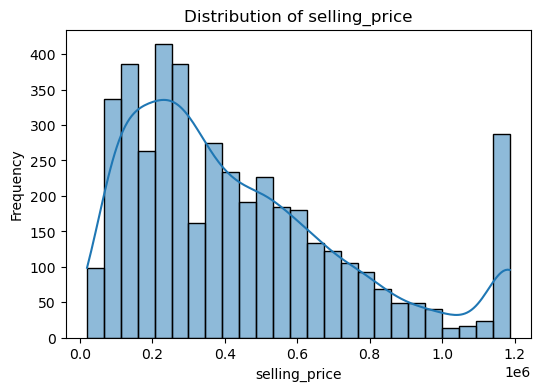

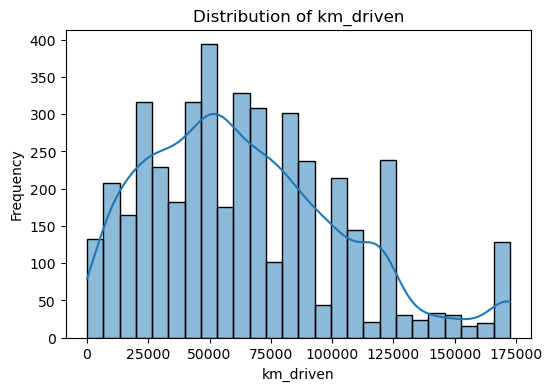

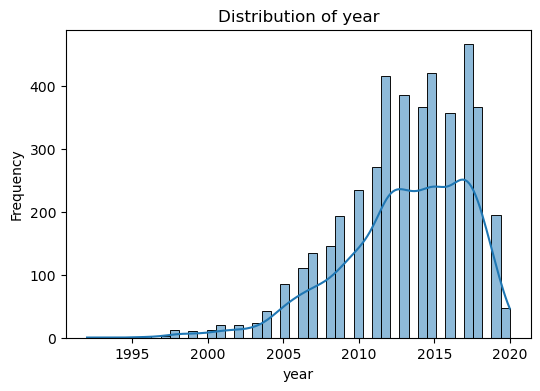

In [85]:
for col in num_cols:
    plt.figure(figsize=(6,4))
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

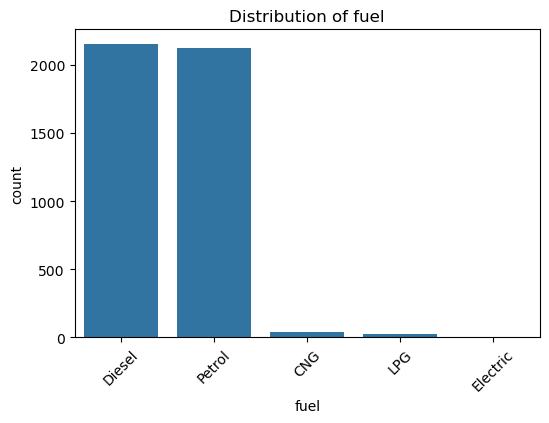

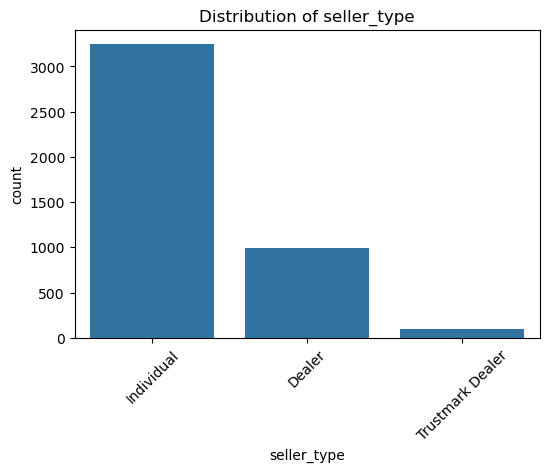

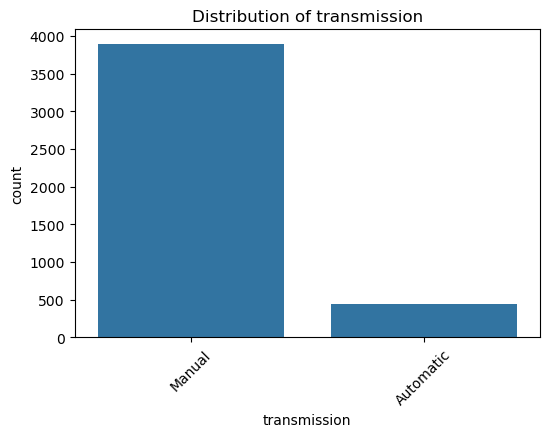

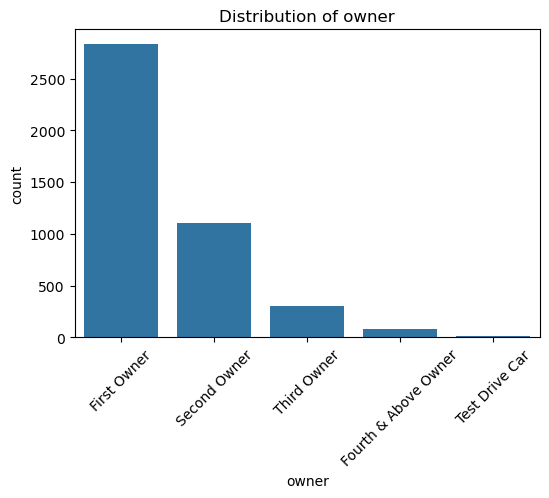

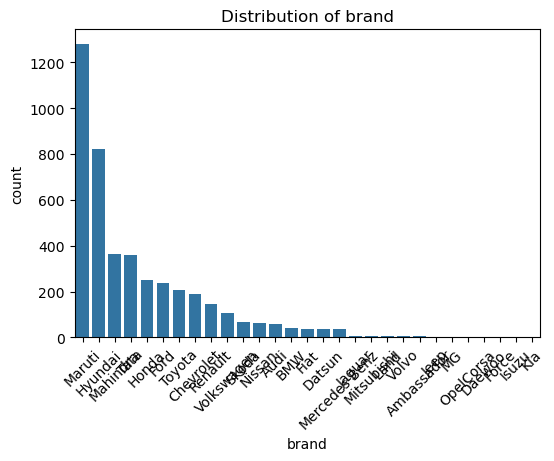

In [86]:
for col in cat_cols:
    plt.figure(figsize=(6,4))
    sns.countplot(data=df, x=col, order=df[col].value_counts().index)
    plt.title(f'Distribution of {col}')
    plt.xticks(rotation=45)
    plt.show()

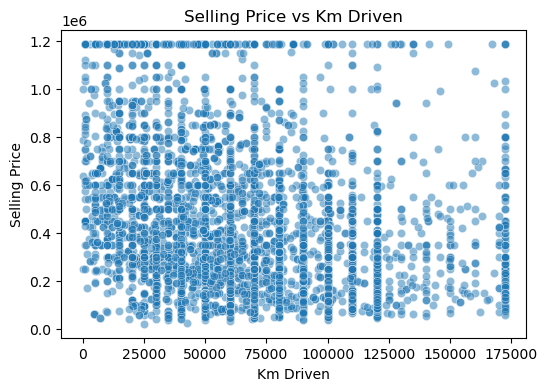

In [87]:
plt.figure(figsize=(6,4))
sns.scatterplot(data=df, x='km_driven', y='selling_price', alpha=0.5)
plt.title('Selling Price vs Km Driven')
plt.xlabel('Km Driven')
plt.ylabel('Selling Price')
plt.show()

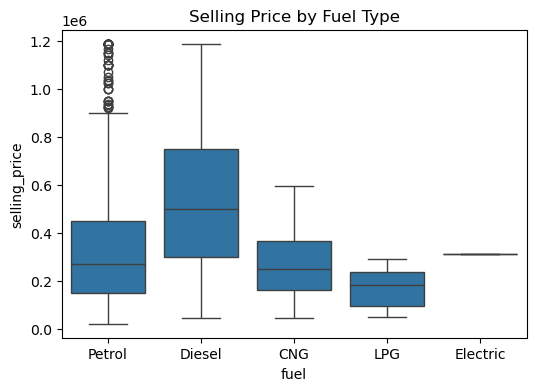

In [88]:
plt.figure(figsize=(6,4))
sns.boxplot(data=df, x='fuel', y='selling_price')
plt.title('Selling Price by Fuel Type')
plt.show()

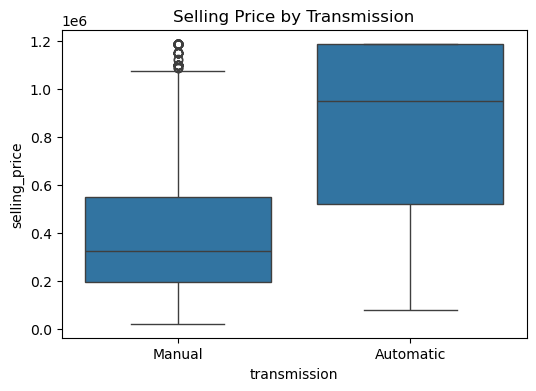

In [89]:
plt.figure(figsize=(6,4))
sns.boxplot(data=df, x='transmission', y='selling_price')
plt.title('Selling Price by Transmission')
plt.show()

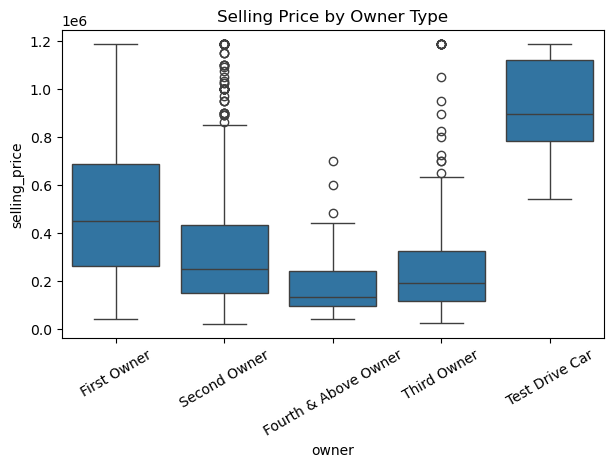

In [90]:
plt.figure(figsize=(7,4))
sns.boxplot(data=df, x='owner', y='selling_price')
plt.xticks(rotation=30)
plt.title('Selling Price by Owner Type')
plt.show()

In [91]:
top_brands = df['brand'].value_counts().head(10).index

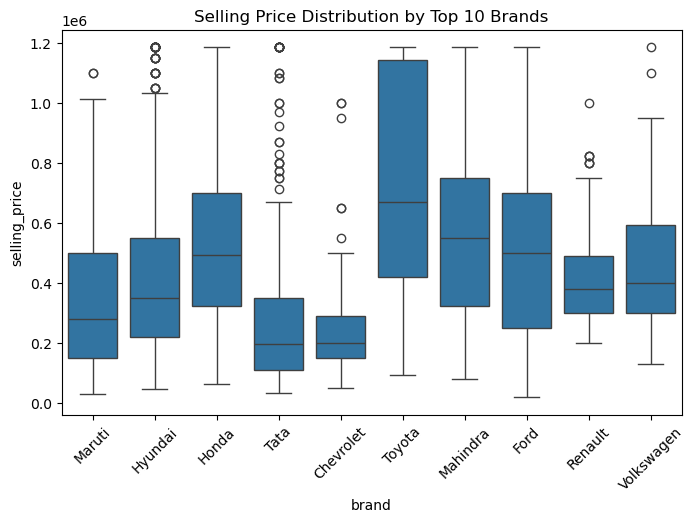

In [92]:
plt.figure(figsize=(8,5))
sns.boxplot(
    data=df[df['brand'].isin(top_brands)],
    x='brand',
    y='selling_price'
)
plt.xticks(rotation=45)
plt.title('Selling Price Distribution by Top 10 Brands')
plt.show()

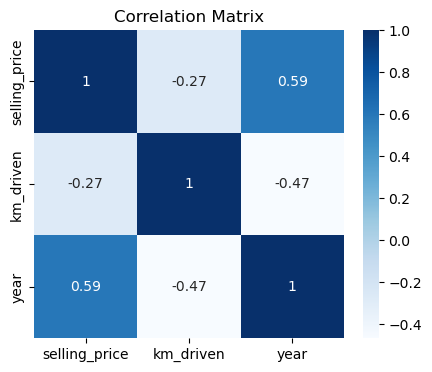

In [93]:
num_cols = ['selling_price', 'km_driven', 'year']
corr = df[num_cols].corr()

plt.figure(figsize=(5,4))
sns.heatmap(corr, annot=True, cmap='Blues')
plt.title('Correlation Matrix')
plt.show()

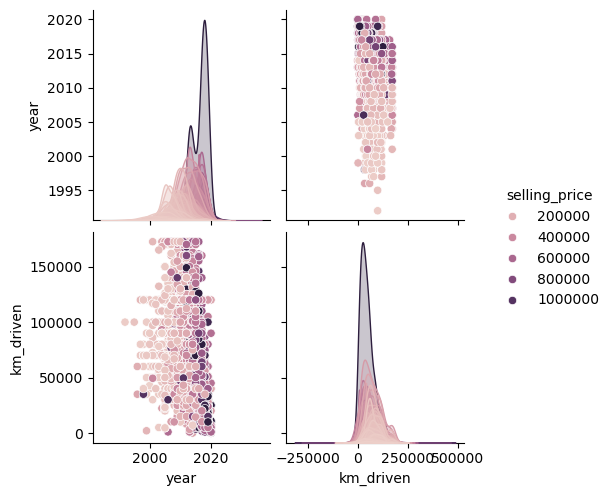

In [94]:
sns.pairplot(df,hue='selling_price')
plt.show()

In [95]:
df.drop(columns=['name'], inplace=True)

In [96]:
cat_cols = df.select_dtypes(include='object').columns
cat_cols

Index(['fuel', 'seller_type', 'transmission', 'owner', 'brand'], dtype='object')

In [97]:
owner_map = {
    'First Owner': 1,
    'Second Owner': 2,
    'Third Owner': 3,
    'Fourth & Above Owner': 4,
    'Test Drive Car': 0
}

df['owner'] = df['owner'].map(owner_map)

In [98]:
df['transmission'] = df['transmission'].map({
    'Manual': 0,
    'Automatic': 1
})

In [99]:
df = pd.get_dummies(
    df,
    columns=['fuel', 'seller_type'],
    drop_first=True
)

In [100]:
top_brands = df['brand'].value_counts().head(10).index

df['brand'] = df['brand'].apply(
    lambda x: x if x in top_brands else 'Other'
)

df = pd.get_dummies(df, columns=['brand'], drop_first=True)

In [101]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4340 entries, 0 to 4339
Data columns (total 21 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   year                          4340 non-null   int64  
 1   selling_price                 4340 non-null   float64
 2   km_driven                     4340 non-null   float64
 3   transmission                  4340 non-null   int64  
 4   owner                         4340 non-null   int64  
 5   fuel_Diesel                   4340 non-null   bool   
 6   fuel_Electric                 4340 non-null   bool   
 7   fuel_LPG                      4340 non-null   bool   
 8   fuel_Petrol                   4340 non-null   bool   
 9   seller_type_Individual        4340 non-null   bool   
 10  seller_type_Trustmark Dealer  4340 non-null   bool   
 11  brand_Ford                    4340 non-null   bool   
 12  brand_Honda                   4340 non-null   bool   
 13  bra

In [102]:
df.dtypes

year                              int64
selling_price                   float64
km_driven                       float64
transmission                      int64
owner                             int64
fuel_Diesel                        bool
fuel_Electric                      bool
fuel_LPG                           bool
fuel_Petrol                        bool
seller_type_Individual             bool
seller_type_Trustmark Dealer       bool
brand_Ford                         bool
brand_Honda                        bool
brand_Hyundai                      bool
brand_Mahindra                     bool
brand_Maruti                       bool
brand_Other                        bool
brand_Renault                      bool
brand_Tata                         bool
brand_Toyota                       bool
brand_Volkswagen                   bool
dtype: object

In [103]:
df.head()

,year,selling_price,km_driven,transmission,owner,fuel_Diesel,fuel_Electric,fuel_LPG,fuel_Petrol,seller_type_Individual,...,brand_Ford,brand_Honda,brand_Hyundai,brand_Mahindra,brand_Maruti,brand_Other,brand_Renault,brand_Tata,brand_Toyota,brand_Volkswagen
0,2007,60000.0,70000.0,0,1,False,False,False,True,True,...,False,False,False,False,True,False,False,False,False,False
1,2007,135000.0,50000.0,0,1,False,False,False,True,True,...,False,False,False,False,True,False,False,False,False,False
2,2012,600000.0,100000.0,0,1,True,False,False,False,True,...,False,False,True,False,False,False,False,False,False,False
3,2017,250000.0,46000.0,0,1,False,False,False,True,True,...,False,False,False,False,False,True,False,False,False,False
4,2014,450000.0,141000.0,0,2,True,False,False,False,True,...,False,True,False,False,False,False,False,False,False,False


In [133]:
df.shape

(868, 2)

In [104]:
df.isnull().sum()

year                            0
selling_price                   0
km_driven                       0
transmission                    0
owner                           0
fuel_Diesel                     0
fuel_Electric                   0
fuel_LPG                        0
fuel_Petrol                     0
seller_type_Individual          0
seller_type_Trustmark Dealer    0
brand_Ford                      0
brand_Honda                     0
brand_Hyundai                   0
brand_Mahindra                  0
brand_Maruti                    0
brand_Other                     0
brand_Renault                   0
brand_Tata                      0
brand_Toyota                    0
brand_Volkswagen                0
dtype: int64

In [105]:
ip = df.drop(columns=['selling_price'])
op = df['selling_price']

In [106]:
ip.head()

,year,km_driven,transmission,owner,fuel_Diesel,fuel_Electric,fuel_LPG,fuel_Petrol,seller_type_Individual,seller_type_Trustmark Dealer,brand_Ford,brand_Honda,brand_Hyundai,brand_Mahindra,brand_Maruti,brand_Other,brand_Renault,brand_Tata,brand_Toyota,brand_Volkswagen
0,2007,70000.0,0,1,False,False,False,True,True,False,False,False,False,False,True,False,False,False,False,False
1,2007,50000.0,0,1,False,False,False,True,True,False,False,False,False,False,True,False,False,False,False,False
2,2012,100000.0,0,1,True,False,False,False,True,False,False,False,True,False,False,False,False,False,False,False
3,2017,46000.0,0,1,False,False,False,True,True,False,False,False,False,False,False,True,False,False,False,False
4,2014,141000.0,0,2,True,False,False,False,True,False,False,True,False,False,False,False,False,False,False,False


In [107]:
op.head()

0     60000.0
1    135000.0
2    600000.0
3    250000.0
4    450000.0
Name: selling_price, dtype: float64

In [108]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(ip,op,test_size=0.2)

In [109]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.fit_transform(x_test)

In [110]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

In [111]:
ypred = lr.predict(x_test)

In [112]:
#Accuracy,r2score,mean squared error
from sklearn.metrics import r2_score,mean_squared_error
r2 = r2_score(ypred,y_test)
mse = mean_squared_error(ypred,y_test)
print('R2 score is :',r2)
print('Mean Squared Error is :',mse)

R2 score is : 0.42610464215105603
Mean Squared Error is : 35671733889.8986


In [113]:
df = pd.DataFrame({'Prediction':ypred,'Actual data':y_test})
df.head()

,Prediction,Actual data
2235,632298.790328,509999.000
3459,501329.788255,500000.000
2377,329583.520274,225000.000
2779,858590.268267,1186875.375
3456,452176.653609,550000.000


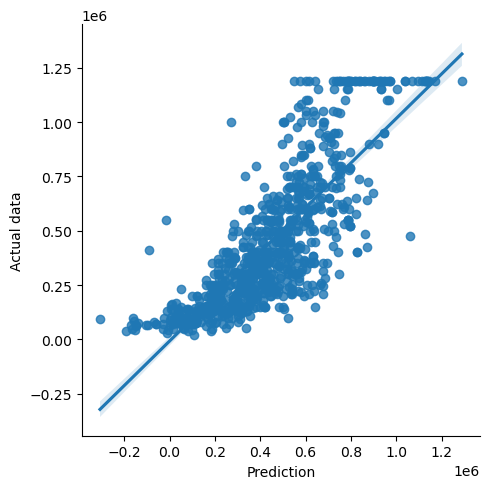

In [114]:
sns.lmplot(df,x='Prediction',y='Actual data')
plt.show()

In [115]:
from sklearn.linear_model import Ridge
Rl = Ridge(alpha=1.0)
Rl.fit(x_train,y_train)

Ridge()

In [116]:
ypred = Rl.predict(x_test)

In [117]:
from sklearn.metrics import r2_score,mean_squared_error
r2 = r2_score(ypred,y_test)
mse = mean_squared_error(ypred,y_test)
print('R2 score is :',r2)
print('Mean Squared Error is :',mse)

R2 score is : 0.42580763629416174
Mean Squared Error is : 35668957871.97818


In [118]:
df = pd.DataFrame({'Prediction':ypred,'Actual data':y_test})
df.head()

,Prediction,Actual data
2235,632241.563070,509999.000
3459,501196.428951,500000.000
2377,329554.329040,225000.000
2779,858496.504001,1186875.375
3456,452097.242634,550000.000


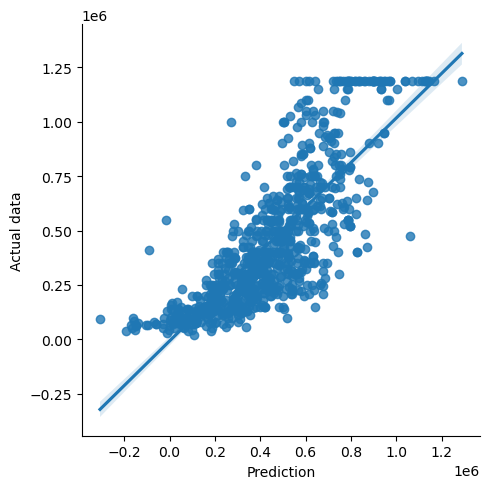

In [119]:
sns.lmplot(df,x='Prediction',y='Actual data')
plt.show()

In [120]:
from sklearn.linear_model import Lasso
Lr = Lasso(alpha=0.001)
Lr.fit(x_train,y_train)

Lasso(alpha=0.001)

In [121]:
ypred = Lr.predict(x_test)

In [122]:
from sklearn.metrics import r2_score,mean_squared_error
r2 = r2_score(ypred,y_test)
mse = mean_squared_error(ypred,y_test)
print('R2 score is :',r2)
print('Mean Squared Error is :',mse)

R2 score is : 0.4261046291608632
Mean Squared Error is : 35671733692.032715


In [123]:
df = pd.DataFrame({'Prediction':ypred,'Actual data':y_test})
df.head()

,Prediction,Actual data
2235,632298.787511,509999.000
3459,501329.778886,500000.000
2377,329583.516104,225000.000
2779,858590.265207,1186875.375
3456,452176.649835,550000.000


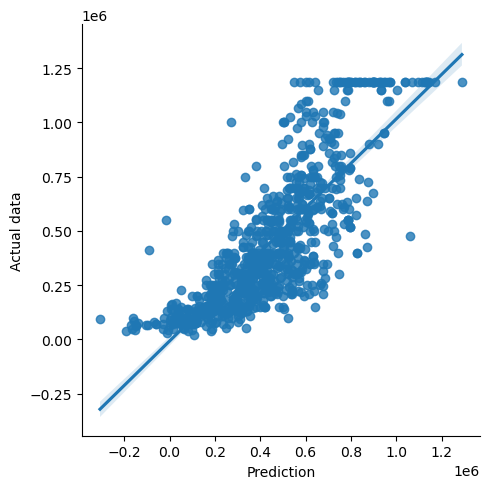

In [124]:
sns.lmplot(df,x='Prediction',y='Actual data')
plt.show()

In [125]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(
    n_estimators=200,
    max_depth=15,
    min_samples_split=5,
    min_samples_leaf=2,
    random_state=42,
    n_jobs=-1
)
rf.fit(x_train, y_train)

RandomForestRegressor(max_depth=15, min_samples_leaf=2, min_samples_split=5,
                      n_estimators=200, n_jobs=-1, random_state=42)

In [126]:
ypred = rf.predict(x_test)

In [127]:
from sklearn.metrics import r2_score,mean_squared_error
r2 = r2_score(ypred,y_test)
mse = mean_squared_error(ypred,y_test)
print('R2 score is :',r2)
print('Mean Squared Error is :',mse)

R2 score is : 0.7064923447659656
Mean Squared Error is : 21539819621.2526


In [128]:
df = pd.DataFrame({'Prediction':ypred,'Actual data':y_test})
df.head()

,Prediction,Actual data
2235,368577.027665,509999.000
3459,348425.161052,500000.000
2377,310040.473830,225000.000
2779,948117.392964,1186875.375
3456,389997.342264,550000.000


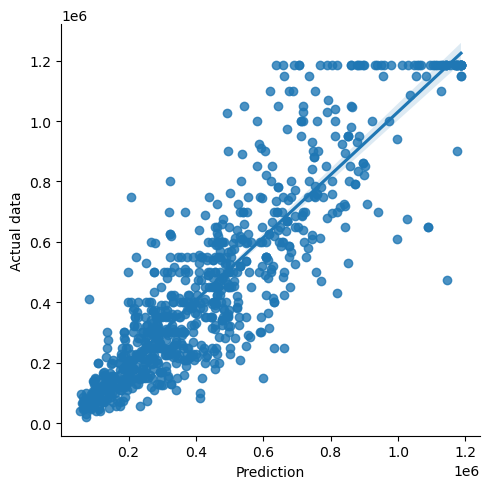

In [129]:
sns.lmplot(df,x='Prediction',y='Actual data')
plt.show()